In [17]:
# Examen 3 de Análisis de datos atmosféricos.
# ICACC - UNAM - maestría.
# 2 de noviembre de 2021.

import os
import warnings

import pandas as pd
import numpy as np

from scipy import stats

from matplotlib import pyplot as plt

from statsmodels.stats.diagnostic import lilliefors
from statsmodels.stats.stattools import durbin_watson

path_r = "../resultados/Examen 3/"

# Si no existe la carpeta, la crea.
if not os.path.exists(path_r):
    os.mkdir(path_r)

# Ignora warnings
# ¡¡usar solo al terminar el programa!!
warnings.filterwarnings("ignore", category = UserWarning)

In [5]:
# Ejercicio 1
# Prueba de hipótesis para la resta
# de medias bajo independencia.

# Datos.
path_d = "../datos/"
fname = "A.3_Wilks.csv"
df = pd.read_csv(path_d + fname, index_col = "Year")

# Separamos los conjuntos.
df_Nino = ( df.where( df["El Niño"] )
    .dropna() )["Temperature"]
df_Nina = ( df.where( ~df["El Niño"] )
    .dropna() )["Temperature"]

# Clave para distinguir los datos
o = df_Nino
a = df_Nina

# Estadísticos.
m_o = o.mean()
s_o = o.std()
n_o = o.shape[0]
v_o = s_o ** 2 / n_o
m_a = a.mean()
s_a = a.std()
n_a = a.shape[0]
v_a = s_a ** 2 / n_a
m_d = np.abs( m_o - m_a )
v_d = v_o + v_a
s_d = np.sqrt( v_d )

# Estadístico de prueba.
z = m_d / np.sqrt( v_d )

# Valor p.
p = stats.norm.cdf(z)
p = 1 - ( 1 - p ) * 2 

# Intervalo de confianza.
alpha = 0.05
crit = stats.norm.ppf( 1 - alpha / 2 )
error = crit * s_d
conf = [ m_d - error, m_d + error ]

print("Ejercicio 1")
print("o -> Niño")
print("a -> Niña")
print("d -> Delta, o - a")
print(f"mu_o:    {m_o:.3f}")
print(f"sigma_o:  {s_o:.3f}")
print(f"var_o:    {v_o:.3f}")
print(f"n_o:      {n_o}")
print(f"mu_a:    {m_a:.3f}")
print(f"sigma_a:  {s_a:.3f}")
print(f"var_a:    {v_a:.3f}")
print(f"n_a:      {n_a}")
print(f"mu_d:     {m_d:.3f}")
print(f"sigma_d:  {s_d:.3f}")
print(f"var_d:    {v_d:.3f}")
print(f"z:        {z:.3f}")
print("1.a: prueba de hipótesis.")
print("Prueba bilateral")
print(f"p:     {p:.6f}")
print("1.b: Intervalo de confianza.")
print(f"alpha:    {alpha:.3f}")
print(f"z_crit:  {crit:.3f}")
print(f"error:   {error:.3f}")
print(f"confianza: [ {conf[0]:.3f}"
    f" , {conf[1]:.3f} ]")


Ejercicio 1
o -> Niño
a -> Niña
d -> Delta, o - a
mu_o:    26.140
sigma_o:  0.792
var_o:    0.126
n_o:      5
mu_a:    24.307
sigma_a:  0.491
var_a:    0.017
n_a:      14
mu_d:     1.833
sigma_d:  0.378
var_d:    0.143
z:        4.850
1.a: prueba de hipótesis.
Prueba bilateral
p:     0.999999
1.b: Intervalo de confianza.
alpha:    0.050
z_crit:  1.960
error:   0.741
confianza: [ 1.092 , 2.573 ]


In [6]:
# Ejercicio 2
# Prueba de hipótesis para la resta
# de medias con correlación serial.

# Datos.
path = "../datos/A.1_Wilks.csv"
df = pd.read_csv(path)[["Ithaca - Min Temp",
    "Canandaigua - Min Temp"]]

# Delta de temperatura.
# Positivo: Canandaigua
#  es mayor que Ithaca.
df["delta"] = ( df["Canandaigua - Min Temp"]
    - df["Ithaca - Min Temp"] )
var = "delta"

# Estadísticos de Delta.
mu = df[var].mean()
sigma = df[var].std()
rho1 = df[var].autocorr()
n = df.shape[0]

# Ajuste por correlación serial.
n_prim = n * ( 1 - rho1 ) / ( 1 + rho1 )

# Varianza con ajuste.
var = sigma ** 2 / n_prim

# Estadístico de prueba.
z = mu / np.sqrt(var)

# Valor p.
p_uni = stats.norm.cdf(z)
p_bi = 1 - ( 1 - p_uni ) * 2 

print("Ejercicio 2")
print(f"mu:      {mu:.3f}")
print(f"sigma:   {sigma:.3f}")
print(f"rho1:    {rho1:.3f}")
print(f"n:      {n:.3f}")
print(f"n_prim: {n_prim:.3f}")
print(f"var:     {var:.3f}")
print(f"z:       {z:.3f}")
print("2.a: prueba bilateral.")
print(f"p:    {p_bi:.6f}")
print("2.b: prueba unilateral.")
print(f"p:    {p_uni:.6f}")


Ejercicio 2
mu:      7.226
sigma:   6.438
rho1:    0.419
n:      31.000
n_prim: 12.699
var:     3.264
z:       4.000
2.a: prueba bilateral.
p:    0.999937
2.b: prueba unilateral.
p:    0.999968


Parámetros ajustados
mu: 3.54
sigma: 1.74

Chi-square
Chi : 1.04
p   : 0.5793
crit: 2.4477

Lilliefors
n   : 30
D_s :  0.142
crit:  0.161


(0.0, 1.0)

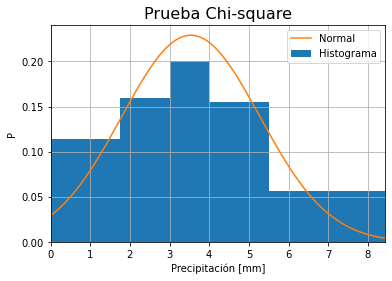

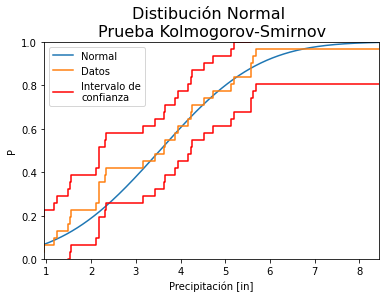

In [8]:
# Ejercicio 3

# Datos
path_d = "../datos/"
fname = "Table 4.8.csv"
df = pd.read_csv(path_d + fname,
    index_col = "Year")
var = "Precipitation"

# Ajuste de parámetros.
mu, sigma = stats.norm.fit( df[var] )
# Parámetros estimados.
params = 2

print("Parámetros ajustados")
print(f"mu: {mu:.2f}")
print(f"sigma: {sigma:.2f}")

# 3.a: Chi-square
# Histograma de datos observados.
bins_lim = [ 0, 1.75, 3, 4, 5.5,
    df[var].max() ]
n_obs, bins = np.histogram( 
    df[var], bins = bins_lim )

# Se discretizan las distribuciones continuas.
prob_norm = np.array( [
    stats.norm.cdf(bins_lim[1], mu, sigma),
    stats.norm.cdf(bins_lim[2], mu, sigma) -
    stats.norm.cdf(bins_lim[1], mu, sigma),
    stats.norm.cdf(bins_lim[3], mu, sigma) -
    stats.norm.cdf(bins_lim[2], mu, sigma),
    stats.norm.cdf(bins_lim[4], mu, sigma) -
    stats.norm.cdf(bins_lim[3], mu, sigma),
    stats.norm.sf(bins_lim[4], mu, sigma) 
    ] )
n_norm = n_obs.sum() * prob_norm

# Graficamos los datos y las distribuciones.
fig, ax = plt.subplots()

df[var].hist( bins = bins_lim,
    density = True, ax = ax )

x = np.linspace(0, df[var].max(), 1000)
y = stats.norm.pdf(x, mu, sigma)

ax.plot(x, y)

ax.set_title("Prueba Chi-square",
    fontsize = 16)
ax.set_xlabel("Precipitación [mm]")
ax.set_ylabel("P")
ax.legend(["Normal", "Histograma"])
ax.set_xlim(0, bins_lim[-1])
ax.set_ylim(0)

# Prueba chi-square.
alpha_test = 0.05
clases = bins.shape[0] - 1
nu = clases - params - 1
crit = stats.chi.ppf(1 - alpha_test, nu)

AUTO = False
#AUTO = True
if AUTO:
    # Automática.
    chi_test = stats.chisquare(
        n_obs, n_norm, ddof = params)
    chi = chi_test.statistic
    p = chi_test.pvalue
else:
    # Manual.
    chi = ( ( n_obs - n_norm ) ** 2
        / n_norm ).sum()
    p = stats.chi.sf(chi, nu)

print("")
print("Chi-square")
print(f"Chi : {chi:.2f}")
print(f"p   : {p:.4f}")
print(f"crit: {crit:.4f}")

# 3.b. Lilliefors
# Prueba Kolmogorov-Smirnov.

# Tamaño de la muestra.
n = df[var].shape[0]

# Frecuencia acumulada.
# Criterio de Weibull.
F = ( range( 1, n + 1 ) /
    np.float64( n + 1 ) )

# Frecuencia acumulada de
# distribución normal.
x = df[var].sort_values()
F_n = stats.norm.cdf(
    x, mu, sigma )

# Lilliefors critical value.
crit = 0.161
if AUTO:
    # Automático.
    # Smirnov test statistic.
    D_s, p = lilliefors( df[var] )
else:
    # Manual.
    # Smirnov test statistic.
    D = np.abs( F - F_n )
    D_s = D.max()
    alpha = 0.05

print("")
print("Lilliefors")
print(f"n   : {n}")
print(f"D_s :  {D_s:.3f}")
if AUTO:
    print(f"p   :  {p:.3f}")
print(f"crit:  {crit:.3f}")

# Graficamos las distribuciones.
x_n = np.linspace( df[var].min(),
    df[var].max(), 1000 )
y_n = stats.norm.cdf( x_n, mu, sigma )

fig, ax = plt.subplots()
ax.plot(x_n, y_n)

# Grficamos la frecuencia acumulada.
ax.plot(df[var].sort_values(),
    F, drawstyle = "steps")

# Graficamos los intervalos de confianza.
# Distribución Kolmogorov-Smirnov
ax.plot( x, F - crit,
    drawstyle = "steps", color = "red" )
ax.plot( x, F + crit,
    drawstyle = "steps", color = "red" )

ax.set_title("Distibución Normal \n"
    "Prueba Kolmogorov-Smirnov",
    fontsize = 16)
ax.set_xlabel("Precipitación [in]")
ax.set_ylabel("P")
ax.legend(["Normal",
    "Datos", "Intervalo de\nconfianza"])
ax.set_xlim( df[var].min(), df[var].max() )
ax.set_ylim(0, 1)

In [11]:
# Ejercicio 4
# Prueba Wilcoxon-Mann-Whitney.

ej = "4. Prueba Wilcoxon-Mann-Wthiney"

# Datos.
path_d = "../datos/"
fname = "A.3_Wilks.csv"
df = pd.read_csv(path_d + fname, index_col = "Year")

# Ordenamos los valores.

df.sort_values("Pressure", inplace = True)
# Creamos la columan de rangos y un
# índice ascendiente para verificar
# que el rango esté bien calculado. 
df.reset_index(inplace = True)
df.index += 1
df.reset_index(inplace = True)
df.rename(columns = {"index": "rank"},
    inplace = True)
df.index += 1

# Revisamos los valores repetidos.
df["Repeated"] = df.duplicated("Pressure")
for i in df.itertuples():
    if i.Repeated == True:
        # Hay tres valores repetidos.
        if df.loc[i[0] - 1,
            "Repeated"] == True:
            # Promedio de los rangos.
            for j in range(i[0] - 2,  i[0] + 1):
                df.loc[j, "rank"] = i.rank - 1
        # Hay dos valore1☼ repetidos.
        else:
            # Promedio de los rangos.
            for j in range(i[0] - 1,  i[0] + 1):
                df.loc[j, "rank"] = (
                    2 * i.rank - 1 ) / 2

# Separamos los conjuntos.
df_Nino = ( df.where( df["El Niño"] )
    .dropna() )
df_Nina = ( df.where( ~df["El Niño"] )
    .dropna() )

# Clave para distinguir los datos
o = df_Nino
a = df_Nina

# Tamaños de las muestras.
n_1 = o.shape[0]
n_2 = a.shape[0]

# Suma de los rangos.
R_1 = o["rank"].sum()
R_2 = a["rank"].sum()

# Estadístico de prueba.
U_1 = R_1 - n_1 / 2 * ( n_1 + 1 )
U_2 = R_2 - n_2 / 2 * ( n_2 + 1 )

# Parámetros de la distribución nula.
m_U = n_1 * n_2 / 2
s_U = np.sqrt( n_1 * n_2 *
    ( n_1 + n_2 + 1 ) / 12 )

# Estadístico de prueba normalizado.
z_U = ( U_1 - m_U ) / s_U

# Nivel de significancia.
alpha_test = 0.05

# Valor crítico.
z_crit = stats.norm.ppf(1- alpha_test / 2)

# p-value
p = stats.norm.cdf(-z_U)
p = ( 1 - p ) * 2

# Prueba automatizada.
MWU = stats.mannwhitneyu(
    o["Pressure"], a["Pressure"] )

print(ej)
print(f"n_1: {n_1}")
print(f"n_2: {n_2}")
print(f"R_1: {R_1:.1f}")
print(f"R_2: {R_2:.1f}")
print(f"U_1: {U_1:.2f}")
print(f"U_2: {U_2:.2f}")
print(f"m_U: {m_U:.2f}")
print(f"s_U: {s_U:.2f}")
print(f"z_U: {-z_U:.3f}")
print(f"z_c: {z_crit:.3f}")
print(f"p: {p:.3f}")

print("\nAuto")
print(f"U: {MWU.statistic:.2f}")
print(f"p: {MWU.pvalue:.3f}")

df.drop(columns = ["Year", "Temperature",
    "Precipitation", "Repeated"])

4. Prueba Wilcoxon-Mann-Wthiney
n_1: 5
n_2: 14
R_1: 16.0
R_2: 181.0
U_1: 1.00
U_2: 76.00
m_U: 35.00
s_U: 10.80
z_U: 3.148
z_c: 1.960
p: 0.002

Auto
U: 1.00
p: 0.002


,rank,Pressure,El Niño
1,1.5,1009.3,True
2,1.5,1009.3,True
3,3.0,1009.5,True
4,4.0,1009.9,True
5,5.0,1010.6,False
6,6.0,1010.7,True
7,7.5,1010.9,False
8,7.5,1010.9,False
9,9.0,1011.0,False
10,10.5,1011.1,False


Estadísticos
mean     : 20.81
std      : 13.46

Parámetros
Gamma
alpha: 3.01
beta : 7.94
Binomial negativa
p: 0.11
k: 2.70

Chi-square
Gamma
Chi : 2.62
p   : 0.6229
Binomial Negativa
Chi : 2.62
p   : 0.6228
crit: 3.3272


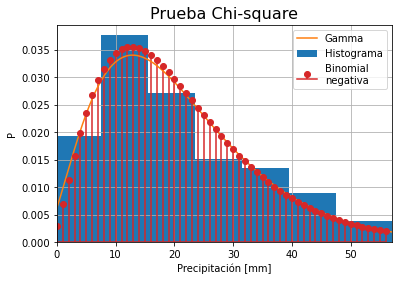

In [84]:
# Ejercicio 5
# Prueba chi-square.

# Datos
path_d = "../datos/"
fname = "Datos_HurrDays_1900-1983.csv"
df = pd.read_csv(path_d + fname,
    sep = "\s+", header = 0,
    names = ["Year", "Hurr_days"],
    index_col = "Year")
v = "Hurr_days"

# Estadísticos
mean = df[v].mean()
std = df[v].std()

print("Estadísticos")
print( f"mean     : {mean:.2f}" )
print( f"std      : {std:.2f}" )

# Ajuste de parámetros.
# Distribución continua gamma.
alpha, zeta, beta = stats.gamma.fit(
    df[v], loc = 0 )
# Distribución discreta binomial negativa.
p = mean / std ** 2
k = mean ** 2 / (std ** 2 - mean)
# Parámetros estimados.
params = 2

print("")
print("Parámetros")
print("Gamma")
print(f"alpha: {alpha:.2f}")
print(f"beta : {beta:.2f}")
print("Binomial negativa")
print(f"p: {p:.2f}")
print(f"k: {k:.2f}")

# 3.a: Chi-square
# Histograma de datos observados.
bins_lim = [ 0, 7.5, 15.5, 23.5, 31.5,
    39.5, 47.5, df[v].max() ]
n_obs, bins = np.histogram( 
    df[v], bins = bins_lim )

# Se discretizan las distribuciones continuas.
prob_gamma = np.array( [
    stats.gamma.cdf(bins_lim[1], alpha, zeta, beta),
    stats.gamma.cdf(bins_lim[2], alpha, zeta, beta) -
    stats.gamma.cdf(bins_lim[1], alpha, zeta, beta),
    stats.gamma.cdf(bins_lim[3], alpha, zeta, beta) -
    stats.gamma.cdf(bins_lim[2], alpha, zeta, beta),
    stats.gamma.cdf(bins_lim[4], alpha, zeta, beta) -
    stats.gamma.cdf(bins_lim[3], alpha, zeta, beta),
    stats.gamma.cdf(bins_lim[5], alpha, zeta, beta) -
    stats.gamma.cdf(bins_lim[4], alpha, zeta, beta),
    stats.gamma.cdf(bins_lim[6], alpha, zeta, beta) -
    stats.gamma.cdf(bins_lim[5], alpha, zeta, beta),
    stats.gamma.sf( bins_lim[6], alpha, zeta, beta) 
    ] )
n_gamma = n_obs.sum() * prob_gamma

# Histograma de la distribución discreta
prob_nbinom = np.array( [
    stats.nbinom.cdf(bins_lim[1], k, p),
    stats.nbinom.cdf(bins_lim[2], k, p) -
    stats.nbinom.cdf(bins_lim[1], k, p),
    stats.nbinom.cdf(bins_lim[3], k, p) -
    stats.nbinom.cdf(bins_lim[2], k, p),
    stats.nbinom.cdf(bins_lim[4], k, p) -
    stats.nbinom.cdf(bins_lim[3], k, p),
    stats.nbinom.cdf(bins_lim[5], k, p) -
    stats.nbinom.cdf(bins_lim[4], k, p),
    stats.nbinom.cdf(bins_lim[6], k, p) -
    stats.nbinom.cdf(bins_lim[5], k, p),
    stats.nbinom.sf( bins_lim[6], k, p) 
    ] )
n_nbinom = n_obs.sum() * prob_nbinom

# Graficamos los datos y las distribuciones.
fig, ax = plt.subplots()

df[v].hist( bins = bins_lim,
    density = True,
    ax = ax )

x_gamma = np.linspace(0, bins_lim[-1], 1000)
y_gamma = stats.gamma.pdf(
    x_gamma, alpha, zeta, beta)

x_nbinom = np.arange(0,
    np.floor( df[v].max() ), 1)
y_nbinom = stats.nbinom.pmf(
    x_nbinom, k, p)

ax.plot(x_gamma, y_gamma)
ax.stem( x_nbinom, y_nbinom,
    linefmt = "C3-",
    markerfmt = "C3o" )

ax.set_title("Prueba Chi-square",
    fontsize = 16)
ax.set_xlabel("Precipitación [mm]")
ax.set_ylabel("P")
ax.legend(["Gamma", "Histograma",
 "Binomial\nnegativa"])
ax.set_xlim(0, bins_lim[-1])
ax.set_ylim(0)

# Prueba chi-square.
alpha_test = 0.05
clases = bins.shape[0]
nu = clases - params - 1
crit = stats.chi.ppf(1 - alpha_test, nu)

#AUTO = False
AUTO = True
if AUTO:
    # Automática.
    chi_test_gamma = stats.chisquare(
        n_obs, n_gamma, ddof = params)
    chi_gamma = chi_test_gamma.statistic
    p_gamma = chi_test_gamma.pvalue
    chi_test_nbinom = stats.chisquare(
        n_obs, n_nbinom, ddof = params)
    chi_nbinom = chi_test_nbinom.statistic
    p_nbinom = chi_test_nbinom.pvalue
else:
    # Manual.
    chi_gamma = ( ( n_obs - n_gamma ) ** 2
        / n_gamma ).sum()
    chi_nbinom = ( ( n_obs - n_nbinom ) ** 2
        / n_nbinom ).sum()
    p_gamma = stats.chi.sf(chi_gamma, nu)
    p_nbinom = stats.chi.sf(chi_nbinom, nu)

print("")
print("Chi-square")
print("Gamma")
print(f"Chi : {chi_gamma:.2f}")
print(f"p   : {p_gamma:.4f}")
print("Binomial Negativa")
print(f"Chi : {chi_nbinom:.2f}")
print(f"p   : {p_nbinom:.4f}")
print(f"crit: {crit:.4f}")


Estadísticos
mean     : 0.57
median   : 0.35
mode     : 0.35
std      : 0.58
var      : 0.34
skewness : 2.46
quartiles: 0.21, 0.35, 0.73
IQR      : 0.53
range    : 3.56

Distribución Gamma
alpha: 0.714
zeta:  0.110
beta : 0.643

Lilliefors
n   : 307
D_s :   0.047
crit:   0.060
p   :   0.485


(0.0, 1.0)

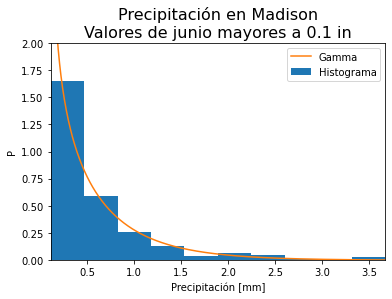

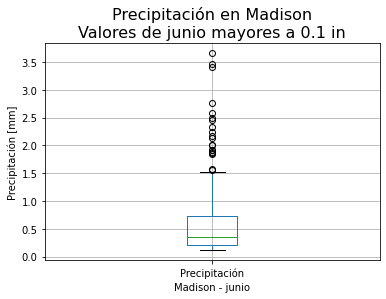

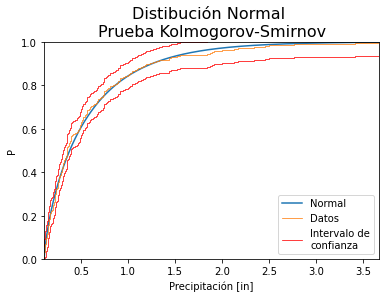

In [25]:
# Ejercicio 6

# Datos.
path  = "../datos/"
fname = "data_madison_precip.txt"
v   = "Precipitación"

# Se lee el archivo .dat
# y se ajusta su formato.
df = pd.read_table(path + fname,
    names = [v], sep = "\s+")
df.index.set_names(["Year", "Month", "Day"],
    inplace = True)

# Se e☼cogen los datos de
# junio mayores a 0.1 in.
df = df.xs(6, level = "Month")
df = df.where(df > 0.1).dropna()

# Estadísticos
mean = df[v].mean()
median = df[v].median()
mode = df[v].mode()[0]
std = df[v].std()
var = df[v].var()
skew = df[v].skew()
quartiles = [ df[v].quantile(0.25), 
    df[v].quantile(),
    df[v].quantile(0.75)]
IQR = ( df[v].quantile(0.75)
    - df[v].quantile(0.25) )
rango = df[v].max() - df[v].min()

print("Estadísticos")
print( f"mean     : {mean:.2f}" )
print( f"median   : {median:.2f}" )
print( f"mode     : {mode:.2f}" )
print( f"std      : {std:.2f}" )
print( f"var      : {var:.2f}" )
print( f"skewness : {skew:.2f}" )
print( f"quartiles: {quartiles[0]:.2f}, "
    f"{quartiles[1]:.2f}, {quartiles[2]:.2f}" )
print( f"IQR      : {IQR:.2f}" )
print( f"range    : {rango:.2f}" )

# Ajuste de parámetros.
alpha, zeta, beta = stats.gamma.fit(
    df[v])#, loc = 0)

print("")
print("Distribución Gamma")
print(f"alpha: {alpha:.3f}")
print(f"zeta: {zeta: .3f}")
print(f"beta : {beta:.3f}")

# Graficamos los datos y las distribuciones.
fig, ax = plt.subplots()
n_obs, bins, patches = plt.hist( 
    df[v], density = True)

x = np.linspace(0, df[v].max(), 1000)
y = stats.gamma.pdf(x, alpha, zeta, beta)
ax.plot(x, y)

ax.set_title("Precipitación en Madison\n"
    "Valores de junio mayores a 0.1 in",
    fontsize = 16)
ax.set_xlabel("Precipitación [mm]")
ax.set_ylabel("P")
ax.legend(["Gamma", "Histograma"])
ax.set_ylim(0, 2)
ax.set_xlim(bins[0], bins[-1])

fig, ax = plt.subplots()
df.boxplot(ax = ax)

ax.set_title("Precipitación en Madison\n"
    "Valores de junio mayores a 0.1 in",
    fontsize = 16)
ax.set_xlabel("Madison - junio")
ax.set_ylabel("Precipitación [mm]")

# Prueba Kolmogorov-Smirnov - Lilliefors.

# Tamaño de la muestra.
n = df[v].shape[0]

# Frecuencia acumulada.
# Criterio de Weibull.
F = ( range( 1, n + 1 ) /
    np.float64( n + 1 ) )

# Frecuencia acumulada de
# distribución normal.
x = df[v].sort_values()
F_n = stats.gamma.cdf(x, 
    alpha, zeta, beta )

# Lilliefors critical value.
crit = 1.05 / np.sqrt( n )

#AUTO = True
AUTO = False
if AUTO:
    # Automático.
    # Smirnov test statistic.
    D_s, p = stats.kstest( df[v], "gamma", 
        args = [alpha, zeta, beta] )
    # Lilliefors en statsmodels no está
    # disponible para la distribución gamma.
else:
    # Manual.
    # Smirnov test statistic.
    D = np.abs( F - F_n )
    D_s = D.max()
    alpha_test = 0.05

print("")
print("Lilliefors")
print(f"n   : {n}")
print(f"D_s :   {D_s:.3f}")
print(f"crit:   {crit:.3f}")
if AUTO:
    print(f"p   :   {p:.3f}")

# Graficamos las distribuciones.
x_n = np.linspace( df[v].min(),
    df[v].max(), 1000 )
y_n = stats.gamma.cdf(
    x_n, alpha, zeta, beta )
fig, ax = plt.subplots()
ax.plot(x_n, y_n)

# Graficamos la frecuencia acumulada.
ax.plot(df[v].sort_values(), F,
    drawstyle = "steps", linewidth = 0.75)

# Graficamos los intervalos de confianza.
# Distribución Kolmogorov-Smirnov
ax.plot( x, F - crit, drawstyle = "steps",
    color = "red", linewidth = 0.75 )
ax.plot( x, F + crit, drawstyle = "steps",
    color = "red", linewidth = 0.75 )

ax.set_title("Distibución Normal \n"
    "Prueba Kolmogorov-Smirnov",
    fontsize = 16)
ax.set_xlabel("Precipitación [in]")
ax.set_ylabel("P")
ax.legend(["Normal",
    "Datos", "Intervalo de\nconfianza"])
ax.set_xlim( df[v].min(), df[v].max() )
ax.set_ylim(0, 1)

# Regresión lineal

1. Profundidad - Oxígeno
n            : 7
a            : 8.6310
b            : -0.1081
X_mean       : 40.7143
Y_mean       : 4.2286
SST          : 36.7343
SSR          : 29.4810
SSE          : 7.2533
RMSE         : 1.2044
R            : 0.8025
F            : 20.3224
F_crit       : 6.6079
p            : 0.0064
t_crit       : 2.5706
Sb           : 0.0107
t_sb         : 0.0276

Profundidad con 3.5 mg/l: 47.45


(0.0, 11.0)

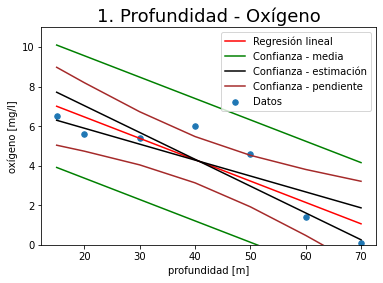

In [25]:
# Problema 1

ej = "1. Profundidad - Oxígeno"

x = np.array( [ 15, 20, 30,
    40, 50, 60, 70 ] )
y = np.array( [ 6.5, 5.6, 5.4,
    6.0, 4.6, 1.4, 0.1 ] )

# Cantidad de predictores.
k = 1

alpha_test = 0.05

# Regresión lineal.
lin_reg = stats.linregress(x, y)
a = lin_reg.intercept
b = lin_reg.slope

# Y gorro.
y_reg = a + b * x

# Residuales.
res = y - y_reg

# ANOVA
n = x.shape[0]
SST = ( ( y - y.mean() ) ** 2 ).sum()
SSR = ( ( y_reg - y.mean() ) ** 2 ).sum()
SSE = ( ( y - y_reg ) ** 2 ).sum()
Se = np.sqrt(SSE / (y.shape[0] - 2 ))
R = SSR / SST
F = SSR / Se ** 2
F_crit = stats.f.ppf( 1 - alpha_test, 1,
    n - 1 - k )
p = 1- stats.f.cdf( F, 1, n - 1 - k )
t_crit = stats.t.ppf( 1 - alpha_test / 2,
    n - 1 - k)
Sb = Se / np.sqrt(
    ( ( x - x.mean() ) ** 2 ).sum()
    * ( n - 1 - k ) )
t_sb = ( t_crit * Sb )

print(ej)
print(f"n            : {n}")
print(f"a            : {a:.4f}")
print(f"b            : {b:.4f}")
print(f"X_mean       : {x.mean():.4f}")
print(f"Y_mean       : {y.mean():.4f}")
print(f"SST          : {SST:.4f}")
print(f"SSR          : {SSR:.4f}")
print(f"SSE          : {SSE:.4f}")
print(f"RMSE         : {Se:.4f}")
print(f"R            : {R:.4f}")
print(f"F            : {F:.4f}")
print(f"F_crit       : {F_crit:.4f}")
print(f"p            : {p:.4f}")
print(f"t_crit       : {t_crit:.4f}")
print(f"Sb           : {Sb:.4f}")
print(f"t_sb         : {t_sb:.4f}")
print("\nProfundidad con 3.5 mg/l: "
    f"{( 3.5 - a ) / b:.2f}")

# Intervalo de confianza para la estimación.
y_lim_1 = y_reg + t_crit * Se
y_lim_2 = y_reg - t_crit * Se

# Intervalo de confianza para la pendiente.
y_t_1 = ( ( lin_reg.slope - t_sb )
    * ( x - x.mean() ) + y.mean() )
y_t_2 = ( ( lin_reg.slope + t_sb )
    * ( x - x.mean() ) + y.mean() )

# Intervalo de confianza para la media.
s_m = np.sqrt ( Se ** 2 * ( 1 / n +
    ( x - x.mean() ) ** 2 /
    ( ( x - x.mean() ) ** 2 ).sum() ) )
y_m_1 = y_reg + t_crit * s_m
y_m_2 =  y_reg - t_crit * s_m

# Se grafican los valores.
fig, ax = plt.subplots()
ax.scatter(x, y, s = 30)
ax.plot(x, y_reg, color = "r", linewidth = 1.5)

# Graficamos el intervalo de confianza.
ax.plot( x, y_lim_1, color = "g",
    linewidth = 1.5 )
ax.plot( x, y_lim_2, color = "g",
    linewidth = 1.5 )
ax.plot( x, y_t_1, color = "black",
    linewidth = 1.5 )
ax.plot( x, y_t_2, color = "black",
    linewidth = 1.5 )
ax.plot( x, y_m_1, color = "brown",
    linewidth = 1.5 )
ax.plot( x, y_m_2, color = "brown",
    linewidth = 1.5 )

ax.set_title(ej,
    fontsize = 18)
ax.set_xlabel("profundidad [m]")
ax.set_ylabel("oxígeno [mg/l]")
ax.legend( ["Regresión lineal", "_",
     "Confianza - media",
    "_", "Confianza - estimación",
    "_", "Confianza - pendiente",
    "Datos" ] )
ax.set_ylim(0, 11)


2.a. Polinomio de primer grado
n            : 10
a_1          : 0.0135
b            : 1.6280
R            : 0.0028

2.b. Polinomio de grado 2
n            : 10
a_1          : 0.0743
a_2          : -0.0055
b            : 1.5063
R            : 0.0057

2.c. Polinomio de grado 3 

n            : 10
a_1          : 3.1884
a_2          : -0.6807
a_3          : 0.0409
b            : -2.0047
R            : 0.9603

2.d. Polinomio de grado 6
n            : 10
a_1          : 3.1895
a_2          : -0.6811
a_3          : 0.0410
a_4          : -0.0000
a_5          : -0.0000
a_6          : -0.0000
b            : -2.0056
R            : 0.9603


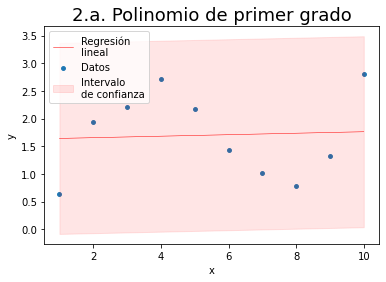

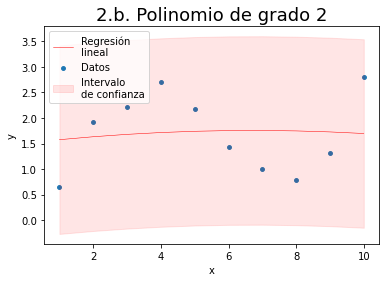

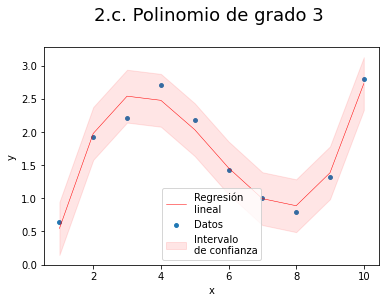

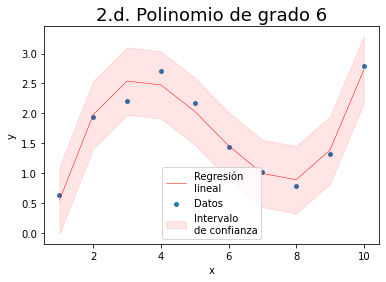

In [22]:
# Problema 2

x = np.arange( 1, 11, 1 )
y = np.array( [ 0.64, 1.93, 2.21, 2.71, 2.18,
    1.43, 1.01, 0.79, 1.32, 2.8 ] )

# Nivel de significancia.
alpha_test = 0.05
t_crit = stats.t.ppf(1 - alpha_test / 2,
    n - k - 1)

# 2.a.
ej = "2.a. Polinomio de primer grado"
YY = np.array([y]).T
x_1 = x
XX = np.array((np.ones_like(x_1), x_1)).T

XX_sq = XX.T @ XX
XX_inv = np.linalg.inv(XX_sq)
BB = XX_inv @ ( XX.T @ YY )
BB.shape

y_reg = ( BB[0,0] + BB[1,0] * x_1 )

# Cantidad de predictores.
k = 1

# Residuales.
res = y - y_reg

# ANOVA
n = x.shape[0]
SST = ( ( y - y.mean() ) ** 2 ).sum()
SSR = ( ( y_reg - y.mean() ) ** 2 ).sum()
SSE = ( ( y - y_reg ) ** 2 ).sum()
Se = np.sqrt(SSE / (y.shape[0] - 2 ))
R = SSR / SST

print("\n" + ej)
print(f"n            : {n}")
print(f"a_1          : {BB[1,0]:.4f}")
print(f"b            : {BB[0,0]:.4f}")
print(f"R            : {R:.4f}")

# Intervalo de confianza
y_lim_1 = y_reg + t_crit * Se
y_lim_2 = y_reg - t_crit * Se

# Se grafican los valores.
fig, ax = plt.subplots()
ax.scatter(x, y, s = 15)
ax.plot(x, y_reg, color = "r", linewidth = 0.5)

# Graficamos el intervalo de confianza.
ax.fill_between(x, y_lim_1, y_lim_2,
    color = "r", alpha = 0.1)

ax.set_title(ej, fontsize = 18)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend( ["Regresión\nlineal",
    "Datos", "Intervalo\nde confianza" ] )

# 2.b.
ej = "2.b. Polinomio de grado 2"
YY = np.array([y]).T
x_1 = x
x_2 = x ** 2
XX = np.array((np.ones_like(x_1), x_1,
    x_2)).T

XX_sq = XX.T @ XX
XX_inv = np.linalg.inv(XX_sq)
BB = XX_inv @ ( XX.T @ YY )
BB.shape

y_reg = ( BB[0,0] + BB[1,0] * x_1
    + BB[2,0] * x_2 )

# Cantidad de predictores.
k = 2

# Residuales.
res = y - y_reg

# ANOVA
n = x.shape[0]
SST = ( ( y - y.mean() ) ** 2 ).sum()
SSR = ( ( y_reg - y.mean() ) ** 2 ).sum()
SSE = ( ( y - y_reg ) ** 2 ).sum()
Se = np.sqrt(SSE / ( n - k - 1 ))
R = SSR / SST

print("\n" + ej)
print(f"n            : {n}")
print(f"a_1          : {BB[1,0]:.4f}")
print(f"a_2          : {BB[2,0]:.4f}")
print(f"b            : {BB[0,0]:.4f}")
print(f"R            : {R:.4f}")

# Intervalo de confianza
y_lim_1 = y_reg + t_crit * Se
y_lim_2 = y_reg - t_crit * Se

# Se grafican los valores.
fig, ax = plt.subplots()
ax.scatter(x, y, s = 15)
ax.plot(x, y_reg, color = "r", linewidth = 0.5)

# Graficamos el intervalo de confianza.
ax.fill_between(x, y_lim_1, y_lim_2,
    color = "r", alpha = 0.1)

ax.set_title(ej, fontsize = 18)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend( ["Regresión\nlineal",
    "Datos", "Intervalo\nde confianza" ] )

# 2.c.
ej = "2.c. Polinomio de grado 3 \n"
YY = np.array([y]).T
x_1 = x
x_2 = x ** 2
x_3 = x ** 3
XX = np.array((np.ones_like(x_1), x_1,
    x_2, x_3)).T

XX_sq = XX.T @ XX
XX_inv = np.linalg.inv(XX_sq)
BB = XX_inv @ ( XX.T @ YY )
BB.shape

y_reg = ( BB[0,0] + BB[1,0] * x_1 
    + BB[2,0] * x_2 + BB[3,0] * x_3
    )

# Cantidad de predictores.
k = 3

# Residuales.
res = y - y_reg

# ANOVA
n = x.shape[0]
SST = ( ( y - y.mean() ) ** 2 ).sum()
SSR = ( ( y_reg - y.mean() ) ** 2 ).sum()
SSE = ( ( y - y_reg ) ** 2 ).sum()
Se = np.sqrt(SSE / ( n - k - 1 ))
R = SSR / SST

print("\n" + ej)
print(f"n            : {n}")
print(f"a_1          : {BB[1,0]:.4f}")
print(f"a_2          : {BB[2,0]:.4f}")
print(f"a_3          : {BB[3,0]:.4f}")
print(f"b            : {BB[0,0]:.4f}")
print(f"R            : {R:.4f}")

# Intervalo de confianza
y_lim_1 = y_reg + t_crit * Se
y_lim_2 = y_reg - t_crit * Se

# Se grafican los valores.
fig, ax = plt.subplots()
ax.scatter(x, y, s = 15)
ax.plot(x, y_reg, color = "r", linewidth = 0.5)

# Graficamos el intervalo de confianza.
ax.fill_between(x, y_lim_1, y_lim_2,
    color = "r", alpha = 0.1)

ax.set_title(ej, fontsize = 18)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend( ["Regresión\nlineal",
    "Datos", "Intervalo\nde confianza" ] )

# 2.d.
ej = "2.d. Polinomio de grado 6"
YY = np.array([y]).T
x_1 = x
x_2 = x ** 2
x_3 = x ** 3
x_4 = x ** 4
x_5 = x ** 5
x_6 = x ** 6
XX = np.array((np.ones_like(x_1), x_1,
    x_2, x_3, x_4, x_5, x_6)).T

XX_sq = XX.T @ XX
XX_inv = np.linalg.inv(XX_sq)
BB = XX_inv @ ( XX.T @ YY )
BB.shape

y_reg = ( BB[0,0] + BB[1,0] * x_1 
    + BB[2,0] * x_2 + BB[3,0] * x_3
    + BB[4,0] * x_4 + BB[5,0] * x_5 
    + BB[6,0] * x_6 )

# Cantidad de predictores.
k = 6

# Residuales.
res = y - y_reg

# ANOVA
n = x.shape[0]
SST = ( ( y - y.mean() ) ** 2 ).sum()
SSR = ( ( y_reg - y.mean() ) ** 2 ).sum()
SSE = ( ( y - y_reg ) ** 2 ).sum()
Se = np.sqrt(SSE / ( n - k - 1 ))
R = SSR / SST

print("\n" + ej)
print(f"n            : {n}")
print(f"a_1          : {BB[1,0]:.4f}")
print(f"a_2          : {BB[2,0]:.4f}")
print(f"a_3          : {BB[3,0]:.4f}")
print(f"a_4          : {BB[4,0]:.4f}")
print(f"a_5          : {BB[5,0]:.4f}")
print(f"a_6          : {BB[6,0]:.4f}")
print(f"b            : {BB[0,0]:.4f}")
print(f"R            : {R:.4f}")

# Intervalo de confianza
y_lim_1 = y_reg + t_crit * Se
y_lim_2 = y_reg - t_crit * Se

# Se grafican los valores.
fig, ax = plt.subplots()
ax.scatter(x, y, s = 15)
ax.plot(x, y_reg, color = "r", linewidth = 0.5)

# Graficamos el intervalo de confianza.
ax.fill_between(x, y_lim_1, y_lim_2,
    color = "r", alpha = 0.1)

ax.set_title(ej, fontsize = 18)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend( ["Regresión\nlineal",
    "Datos", "Intervalo\nde confianza" ] )

# Wilks

7.1. Pressure - Temperature
n            : 20
a            : 959.7735
b            : -0.9249
X_mean       : 1010.9500
Y_mean       : 24.7650
R            : 0.6896
S_b          : 0.0345
e. 0.8597
f. 0.9085
Significancia pendiente: -26.832482513445406


(21.0, 27.6482631955556)

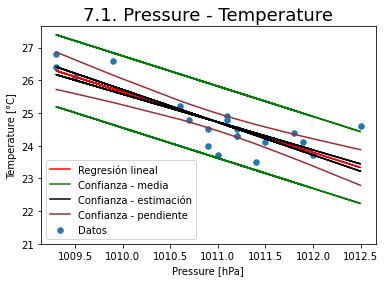

In [28]:
# Ejercicio 7.1
# Regresión lineal simple.

# Datos.
path_d = "../datos/"
fname = "A.3_Wilks.csv"
df = pd.read_csv(path_d + fname, index_col = "Year")

x = df["Pressure"]
y = df["Temperature"]

k = 1

ej = "7.1. Pressure - Temperature"

alpha_test = 0.05
z = stats.norm.ppf(1 - alpha_test / 2)

# Regresión lineal.
lin_reg = stats.linregress(x, y)
a = lin_reg.intercept
b = lin_reg.slope

# Y gorro.
y_reg = a + b * x

# Residuales.
res = y - y_reg

# ANOVA
n = x.shape[0]
SST = ( ( y - y.mean() ) ** 2 ).sum()
SSR = ( ( y_reg - y.mean() ) ** 2 ).sum()
SSE = ( ( y - y_reg ) ** 2 ).sum()
Se = np.sqrt(SSE / (y.shape[0] - 2 ))
R = SSR / SST
F = SSR / Se ** 2
F_crit = stats.f.ppf( 1 - alpha_test, 1,
    n - 1 - k )
p = stats.f.cdf( F, 1, n - 1 - k )
t_crit = stats.t.ppf(
    1 - alpha_test/2, n - 1 - k )
S_b = Se / np.sqrt(
    ( ( x - x.mean() ) ** 2 )
    .sum() * (n - 1 - k) )
t_sb = ( t_crit * S_b )
durbin = durbin_watson(res)

# Sginificancia de la pendiente.
ratio_b = b / S_b

# Intervalo de confianza para una estimación.
x_0 = 1013
sm = np.sqrt ( Se ** 2 * ( 1 + 1 / n +
    ( x_0 - x.mean() ) ** 2 /
    ( ( x - x.mean() ) ** 2 ).sum() ) )
prob_sm = 1 - ( 1 - stats.t.cdf(
    1 / sm , n - 1 - k ) ) * 2
prob_se = 1 - ( 1 - stats.t.cdf(
    1 / Se , n - 1 - k ) ) * 2

print(ej)
print(f"n            : {n}")
print(f"a            : {a:.4f}")
print(f"b            : {b:.4f}")
print(f"X_mean       : {x.mean():.4f}")
print(f"Y_mean       : {y.mean():.4f}")
print(f"R            : {R:.4f}")
print(f"S_b          : {S_b:.4f}")
print(f"e. {prob_sm:.4f}")
print(f"f. {prob_se:.4f}")
print(f"Significancia pendiente: {ratio_b}")

# Intervalo de confianza para la estimación.
y_lim_1 = y_reg + z * Se
y_lim_2 = y_reg - z * Se

# Intervalo de confianza para la pendiente.
y_t_1 = ( ( lin_reg.slope - t_sb )
    * ( x - x.mean() ) + y.mean() )
y_t_2 = ( ( lin_reg.slope + t_sb )
    * ( x - x.mean() ) + y.mean() )

# Intervalo de confianza para la media.
s_m = np.sqrt ( Se ** 2 * ( 1 / n +
    ( x - x.mean() ) ** 2 /
    ( ( x - x.mean() ) ** 2 ).sum() ) )
y_m_1 = y_reg + t_crit * s_m
y_m_2 =  y_reg - t_crit * s_m
y_m_1.name = "y_m_1"
y_m_2.name = "y_m_2"
err_m = pd.concat( (x, y_m_1, y_m_2),
    axis = 1 ).sort_values(x.name)

# Se grafican los valores.
fig, ax = plt.subplots()
ax.scatter(x, y, s = 30)
ax.plot(x, y_reg, color = "r", linewidth = 1.5)

# Graficamos el intervalo de confianza.
ax.plot( x, y_lim_1, color = "g",
    linewidth = 1.5 )
ax.plot( x, y_lim_2, color = "g",
    linewidth = 1.5 )
ax.plot( x, y_t_1, color = "black",
    linewidth = 1.5 )
ax.plot( x, y_t_2, color = "black",
    linewidth = 1.5 )
ax.plot( err_m[x.name], err_m["y_m_1"],
    color = "brown", linewidth = 1.5 )
ax.plot( err_m[x.name], err_m["y_m_2"],
    color = "brown", linewidth = 1.5 )

ax.set_title(ej,
    fontsize = 18)
ax.set_xlabel(x.name + " [hPa]")
ax.set_ylabel(y.name + " [°C]")
ax.legend( ["Regresión lineal", "_",
     "Confianza - media",
    "_", "Confianza - estimación",
    "_", "Confianza - pendiente",
    "Datos" ] )
ax.set_ylim(21)

In [72]:
# Ejercicio 7.2
# Tabla ANOVA.

ej = "7.2. Tabla ANOVA."

n = 27
k = 1
SST = 318.2874
SSR = 316.6065
se = np.sqrt( ( SST - SSR )
    / ( n - k - 1 ) )
b = 0.69

# Desviación de la pendiente.
sb = se * b / np.sqrt( SSR )

# Probabilidad de estar dentro del
# rango de la estimación.
prob = 1 - ( 1 - stats.t.cdf(
    0.2 / se, n - k - 1 ) ) * 2

print(ej)
print(f"prob: {prob:.3f}")
print(f"sb  : {sb:.2f}")
print(f"prueba pendiente: {b / sb:.2f}")

7.2. Tabla ANOVA.
prob: 0.552
sb  : 0.01
prueba pendiente: 68.62


In [73]:
# Ejercicio 7.4
# Regresión no lineal.

# Datos.
path_d = "../datos/"
fname = "A.3_Wilks.csv"
df = pd.read_csv(path_d + fname,
    index_col = "Year")
data = df.loc[1956]

ej = "7.4. Regresión no lineal."

# Nivel de significancia.
alpha_test = 0.95
# Mean squared error.
mse = 0.701

# Regresión no lineal.
pre = np.exp( 499.4 - 0.512 * data["Pressure"]
    + 0.796 * data["Temperature"] ) - 1
k = 2

# Valor crítico, t de Student.
t_crit = stats.t.ppf( 1 - alpha_test/2,
    y.shape[0] - 1 - k )

# Intervalo de confianza para la estimación.
conf = [ pre - t_crit * mse,
    pre + t_crit * mse ]

print(ej)
print(f"pre : {pre:.2f}")
print(f"conf: [ {conf[0]:.2f} "
    f", {conf[1]:.2f} ]")

7.4. Regresión no lineal.
pre : 1.74
conf: [ 1.70 , 1.79 ]
